# Challenge: Palindrome Integer

The purpose of this challenge is to generate an application for the analysis and design of quantum algorithms. For this case it is to prove that it is a palindrome, being the particular case in integers, for this it is considered that a [palindrome](https://en.wikipedia.org/wiki/Palindrome) integer is an integer x for which reverse(x) = x where reverse(x) is x with its digit reversed. Negative numbers are not palindrome.

To get a clearer idea of this, consider the following two cases:


#### Case 1:

Consider the a integer number in the variable $p_1$, as $12588521$.
    
If you change the reverse order of the number, there is 
    
                           
$$ \text{reverdsed}(p_1) = 12588521 .$$


Rename as $p_1'$, it can be verified that

$$p_1 = p_1',$$

hence $p_1$ is a palindrome.


#### Case 2:

Consider the a integer number in the variable $p_2$, as 12583621.
    
If you change the reverse order of the number, there is 
    
                           
$$ \text{reverdsed}(p_2) = 125638521 .$$


Rename as $p_2'$, it can be verified that

$$p_2 \neq p_2',$$

hence $p_2$ is a palindrome.


## Classical Code

Python has an accessible way to achieve this algorithm in a classic way, for this you must pass the integer value in a string or it can be in a list and use the instruction `[::-1]` after the string, that generates the action of putting the string in reverse and with an if condition that both are equal will show us if it is a palindrome or not. 

You can check the next code with the previous case

In [1]:
def isPalindrome(A):
        if(str(A)==str(A)[::-1]):
            return True
        return False

Solution of case 1 using the classic algorithm

In [2]:
isPalindrome(12588521)

True

Solution of case 1 using the classic algorithm

In [3]:
isPalindrome(12583621)

False

#### new proposal

Some changes are made to the algorithm such as considering that it is a list of numbers for each digit of the number. 

In [4]:
def isPalindrome(A):
        A = [int(x) for x in str(A)]
        len_pa = len(A)
        for i in range(int(len_pa/2)):
            if A[i] != A[len_pa-i-1]:
                return False
        return True


Case 1, with the new proposal

In [5]:
isPalindrome(12588521)

True

Case 2, with the new proposal

In [6]:
isPalindrome(12583621)

False

## Quantum Proposal


For this challenge, the idea of the second proposal will be used and generated in a quantum circuit. And consider the previous inputs of both cases:  12588521, 12583621.

**Now the case 1 must be [1,2,5,8,8,5,2,1];**

**and case 2 must be [1,2,5,8,3,6,2,1]**


For this purpose, different blocks will be considered, such as :

- Generate a vector of positive integers, 
- Inverse of the vector,
- Condition of being equal the number of two vectors.

#### Generate a vector of  positive integers


Encoding to classical to quantum consider the encoding basis, where classical $N$-bit string can be representated as a basis state of a $N$-qubit system. For example, if the classical binary strins  is 101 ,  the quantum state must be $|101\rangle$. 


The case of storing the values in a vector can be represented in a QRAM( some references https://arxiv.org/pdf/0708.1879.pdf, https://github.com/qsharp-community/qram/blob/master/docs/primer.pdf), for this address qubits and information qubits are needed.

From the following vector example [1,5,7,8], for the example is important to use n qubits for the length of the vector and m qubits for the length of the maximum bits representation. The lenght of the vector is 2 and is possible this can be representante in only 2 qubits, because $n^2$, where n is the number of qubits that is $2^2= 4$, therefore n = 2 qubits, for the address, so the state $|00\rangle$ represents the index 1; the state $|01\rangle$ represents the index 1; the state $|10\rangle$ represents the index 2; and the state $11\rangle$ represents the index 3. And m = 4, because the number bigger is 8 in the vector and in the binary representation is $|1000\rangle$.


In [208]:
"""
Method to generate the vector in a quantum circuit, 
the quantum circuit depends of a qubit addres value, can select a binary string representation
in the encoding data.

input_vector: Integer value or a list of positive integer values, example 12588521 or [1,2,5,8,8,5,2,1]

return: a quantum circuit that has a set of qubit address and a set of qubit values. 
"""
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def qc_vector(input_vector):
    if isinstance(input_vector, int):
        input_vector = [int(digit) for digit in str(input_vector)]
    
    n = int(np.ceil(np.log2(len(input_vector))))
    m = int(np.floor(np.log2(max(input_vector)))) + 1
    
    addr = QuantumRegister(n, 'addr')
    mem = QuantumRegister(m, 'mem')
    qc = QuantumCircuit(addr, mem)
    
    for (i, x) in enumerate(input_vector):
        add_x = []
        for (j, bit) in enumerate(bin(i)[2:].zfill(n)):
            if bit == '0': add_x.append(addr[j])
        if add_x: qc.x(add_x)
        target = []
        for (j, bit) in enumerate(bin(x)[2:].zfill(m)):
            if bit == '1': target.append(mem[j])
        for register in target: 
            qc.mcx(addr, register)
        if add_x: qc.x(add_x)
        qc.barrier()
        
    return qc

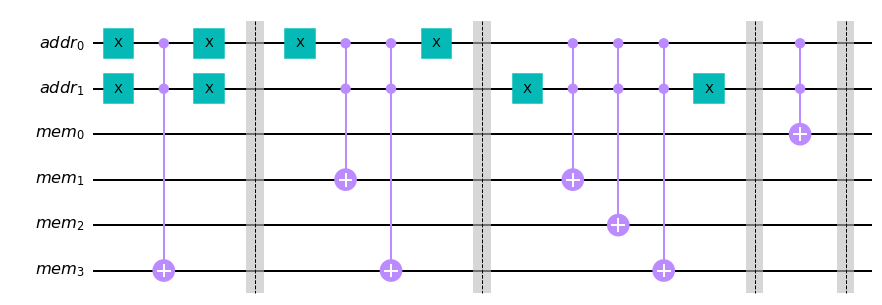

In [209]:
qc = qc_vector([1,5,7,8])
qc.draw(output='mpl')

#### Inverse of the vector

generates a way to represent from the same vector but starting in reversed order, using the previous example [8,7,5,1]. Tip you can use the `qc_vector()` method with previous modification.



In [215]:
"""
Method to generate the vector in a quantum circuit, 
the quantum circuit depends of a qubit addres value, can select a binary string representation
in the encoding data.

input_vector: Integer value or a list of positive integer values, example 12588521 or [1,2,5,8,8,5,2,1]

return: a quantum circuit that has a set of qubit address and a set of qubit values in a reverser order. 
"""

def qc_vector_reverse(input_vector):
    input_vector = input_vector[::-1]

    return qc_vector(input_vector)

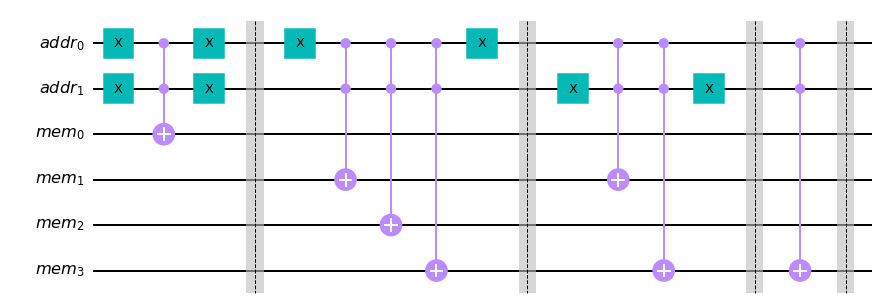

In [216]:
qc_rev = qc_vector_reverse([1,5,7,8])
qc_rev.draw(output='mpl')

#### Condition of being equal the number of two vectors

Design an oracle when two values in a quantum circuit when are different or equals, depend of your choice, activate a flag qubit with a specific state $|0\rangle$ or $|1\rangle$.


Example consider the states $|101\rangle $  and $|110\rangle $, and choice if activate if are equals or different.

In [ ]:
"""
Method to generate an oracle for a  quantum circuit, 
using m+1 qubits, and return a 0 or 1 that neabs different or equals. 

qubit_num: Integer value that representate the values qubits for the qram + 1 , that is the flag qubit. 

return: a quantum circuit that has a set of qubit values + 1 with the flag qubit. 
"""

def quantum_oracle(qubit_number):
    
    
    return #return quantum circuit 

#### Palindrome integer in a quantum circuit 


Using as base the previous functions and/or some auxiliary ones that you consider to be of support and that it returns 0 or1 to represent that it is not or it is a palindrome.

In [ ]:
"""
Method to check if a positive integer value  is a palindrome or not.

input value: Integer value.

return: a boolean value that indicates is a palindrome or not the input_vector
"""

def quantum_isPalindrome(input_value):


    return #return 0 or 1

### Check your quantum algorithm


Consider the values of case 1 and case 2 for your proposal:

- 12588521

- 12583621

In [ ]:
quantum_isPalindrome(12588521)

In [ ]:
quantum_isPalindrome(12583621)

If you are here is because you do it, congrats 🥳 

## References


[1] Deutsch, David, and Richard Jozsa. "Rapid solution of problems by quantum computation." Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences 439.1907 (1992): 553-558., https://www.isical.ac.in/~rcbose/internship/lectures2016/rt08deutschjozsa.pdf

[2] Bernstein, Ethan, and Umesh Vazirani. "Quantum complexity theory." SIAM Journal on computing 26.5 (1997): 1411-1473.https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.655.1186&rep=rep1&type=pdf

[3] Grover, Lov K. , "A fast quantum mechanical algorithm for database search", Proceedings of the 28th Annual ACM Symposium on the Theory of Computing (1996), arXiv:quant-ph/9605043
